# Coffee Roast

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit


## Import data

In [2]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


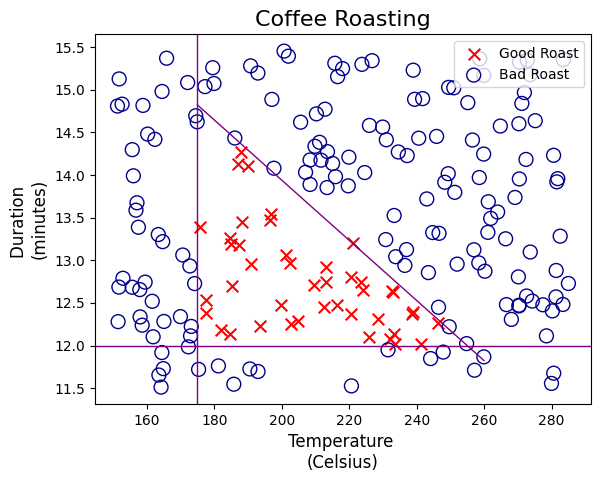

In [3]:
plt_roast(X,Y)


#### Normalization

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


### data engineering

In [5]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


### model

In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.28427458 -0.9885924   0.3279307 ]
 [-0.784243   -0.72420025  0.5484395 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-1.0253077 ]
 [-0.3397022 ]
 [ 0.60831475]] 
b2(1,): [0.]


In [9]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2662
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0334
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0163
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0101
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0068
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.0046
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 965us/step - loss: 0.0032
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0022
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.0016
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0012


In [10]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.3657055  -11.387189     0.22354144]
 [ 11.976494    -0.27985105  10.931877  ]] 
b1: [  2.0314753 -12.25129    13.113831 ]
W2:
 [[-51.69951 ]
 [-59.87411 ]
 [ 49.278545]] 
b2: [-14.903853]


In [11]:
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [12]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.3657055  -11.387189     0.22354144]
 [ 11.976494    -0.27985105  10.931877  ]] 
b1: [  2.0314753 -12.25129    13.113831 ]
W2:
 [[-51.69951 ]
 [-59.87411 ]
 [ 49.278545]] 
b2: [-14.903853]


### Prediction

In [13]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predictions = 
 [[9.9007434e-01]
 [2.9204983e-08]]


In [14]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [15]:
X_test = X
X_testn = norm_l(X_test)  # Assuming norm_l is a normalization function
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
predictions = 
 [[1.00000000e+00]
 [6.68265982e-17]
 [2.99175262e-08]
 [6.15549048e-23]
 [1.00000000e+00]
 [9.99997675e-01]
 [3.28558407e-08]
 [6.13008879e-08]
 [2.99176399e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.99176399e-08]
 [2.26250130e-08]
 [3.00506642e-08]
 [1.46588381e-29]
 [1.04728763e-15]
 [2.99176399e-08]
 [3.77763278e-08]
 [3.11895079e-08]
 [2.99049745e-08]
 [2.99176399e-08]
 [2.99162686e-08]
 [4.35930581e-08]
 [1.00000000e+00]
 [2.03322731e-32]
 [2.99626386e-08]
 [2.99176399e-08]
 [2.93143678e-08]
 [2.99174090e-08]
 [1.00000000e+00]
 [6.97106151e-10]
 [4.34142910e-02]
 [8.98813489e-12]
 [4.68384359e-11]
 [3.15068824e-08]
 [2.99111349e-08]
 [2.99175262e-08]
 [3.02967536e-08]
 [7.41870654e-09]
 [2.99188940e-08]
 [8.19647388e-12]
 [2.99176399e-08]
 [7.32359919e-12]
 [8.89739237e-12]
 [6.71493566e-32]
 [2.99089677e-08]
 [4.95390282e-07]
 [1.00000000e+00]
 [4.28381611e-07]
 [2.10155671e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.991763

In [16]:

yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0